<a href="https://colab.research.google.com/github/franciscoblanco80/predicciones-de-ventas/blob/main/Predicciones_de_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
filename = '/content/drive/MyDrive/Data_science/Semana 2/Pandas/Proyecto1/sales_predictions.csv'
df=pd.read_csv(filename)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) ¿Cuántas filas y columnas?


In [81]:
df.shape

(8523, 12)

2) ¿Cuáles son los tipos de datos en cada variable?

In [82]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

3) ¿Hay duplicados? Si es el caso, eliminen algunos duplicados.

In [83]:
print('Numero de registros duplicados: ', df.duplicated().sum())

Numero de registros duplicados:  0


4) Identifiquen los valores faltantes.

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [85]:
print('encontramos', 8523-7060, 'datos faltantes en la columna Item-Weight')
print('encontramos', 2410, 'datos faltantes en la columna Item-Weight')
df.isna().sum()

encontramos 1463 datos faltantes en la columna Item-Weight
encontramos 2410 datos faltantes en la columna Item-Weight


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [86]:
#5) Decidan cómo abordar los valores faltantes y cómo hacerlo. (Esto requiere sus criterios, así que expliquen su elección).

df['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [87]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [88]:
df['Outlet_Size'].describe()
df['Outlet_Size'].value_counts()
#df['Outlet_Size'].hist()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [89]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


En cuanto a la columna item weight y outlet size y enfocando el set de datos a el objetivo planteado por el ejercicio, "El objetivo de esto es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de las ventas." para hacer predicciones de ventas. Tanto el peso del producto como el tamaño del establecimiento no presentan algun patron de comportamiento o tendencia que indique que el tamaño o el peso esten relacionados al nivel de ventas, por lo cual ambas columnas seran eliminadas del set de datos.

In [90]:
df = df.drop(columns=['Item_Weight', 'Outlet_Size'])
#Se eliminan ambas dada la cantidad de datos faltantes y la poca informacion para asociarla a otro dato de columna o inferir la informacion faltalte.
df.isna().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [91]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


7) Encuentren y arreglen alguna categoría inconsistente de datos (example: fix cat, Cat, and cats so that they are consistent) 

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 666.0+ KB


In [93]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [94]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low fat tiene 2 valores, e incluso podriamos inferir LF como Low Fat, tambien reg como Regular por lo cual haremos las correccioens.

In [95]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [96]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [97]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [98]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [99]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [103]:
#8) Para cualquier columna numérica, obtengan las estadísticas resumidas para cada uno (mínimo, máximo y media)
df.describe().round(2)

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00
mean,0.07,140.99,1997.83,2181.29
std,0.05,62.28,8.37,1706.50
min,0.00,31.29,1985.00,33.29
25%,0.03,93.83,1987.00,834.25
50%,0.05,143.01,1999.00,1794.33
75%,0.09,185.64,2004.00,3101.30
max,0.33,266.89,2009.00,13086.96


# **Graficas**

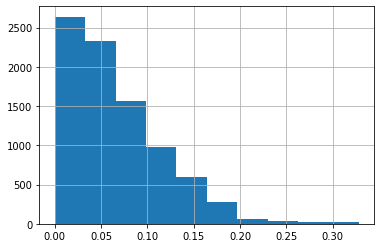

In [105]:
df['Item_Visibility'].hist();

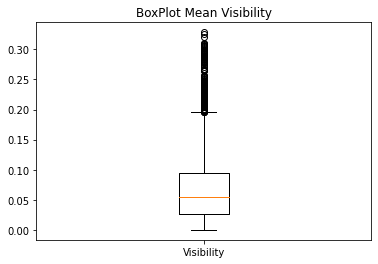

In [108]:
import matplotlib.pyplot as plt
VisibilityMean = df['Item_Visibility']
plt.boxplot([VisibilityMean], labels=['Visibility'])
plt.title('BoxPlot Mean Visibility');


Simplemente un poco de formato

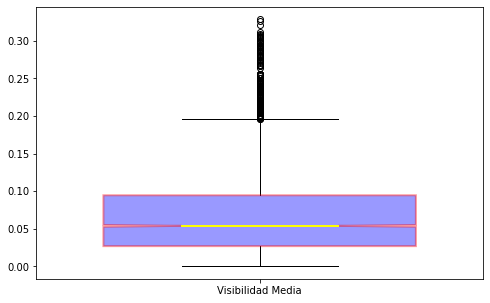

In [116]:
VisibilityMean = df['Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([VisibilityMean],
           notch = True,
           labels=['Visibilidad Media'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Red', facecolor = 'blue', alpha = .4)
          );

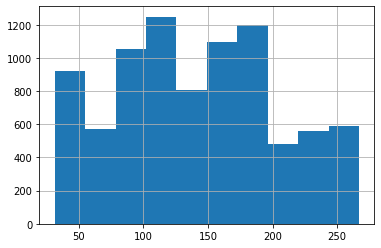

In [117]:
df['Item_MRP'].hist();

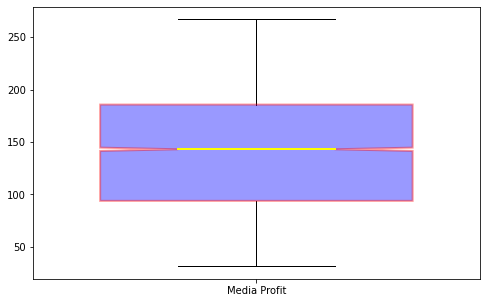

In [121]:
MPR_Mean = df['Item_MRP']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([MPR_Mean],
           notch = True,
           labels=['Media Profit'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Red', facecolor = 'blue', alpha = .4)
          );

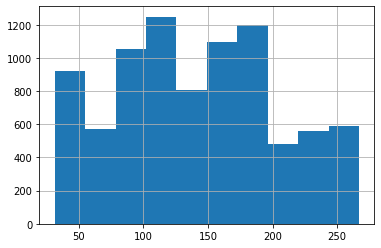

In [119]:
df['Item_MRP'].hist();

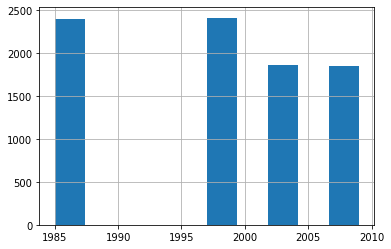

In [120]:
df['Outlet_Establishment_Year'].hist()

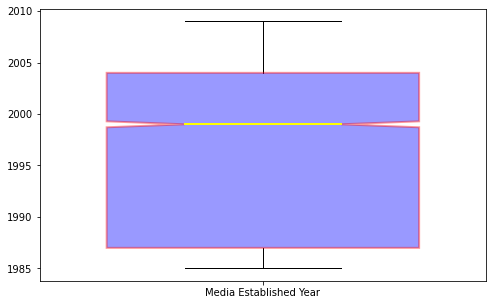

In [122]:
Establishment_Mean = df['Outlet_Establishment_Year']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([Establishment_Mean],
           notch = True,
           labels=['Media Established Year'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Red', facecolor = 'blue', alpha = .4)
          );

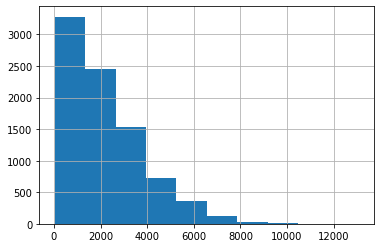

In [125]:
df["Item_Outlet_Sales"].hist();

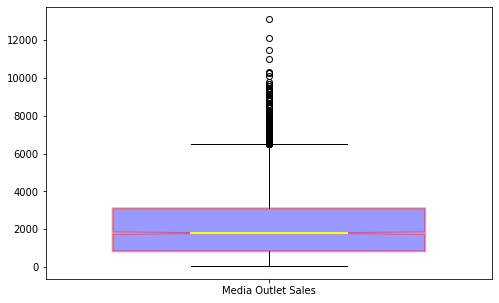

In [126]:
OutletSales_Mean = df['Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([OutletSales_Mean],
           notch = True,
           labels=['Media Outlet Sales'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Red', facecolor = 'blue', alpha = .4)
          );

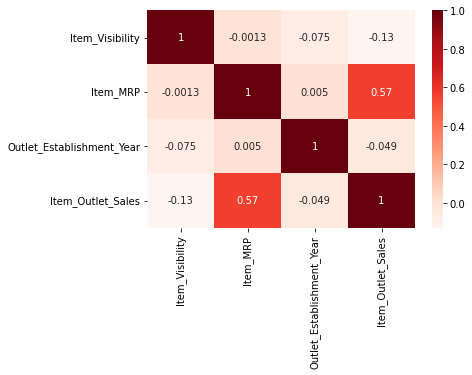

In [101]:
corr = df.corr()
import seaborn as sns
sns.heatmap(corr, cmap = 'Reds', annot = True);

Considerando esta estimacion general:
En general, un coeficiente de correlación más grande que 0,7 se considera “fuerte”.

Entre 0,5 y 0,7 se considera “moderado”.  

Entre 0,3 y 0,5 se considera una correlación “baja”.

Existe una correlacion moderarda positiva (directamente proporcional) entre las columnas item outlet sales (ventas de un producto en una tienda) y el MPR del producto

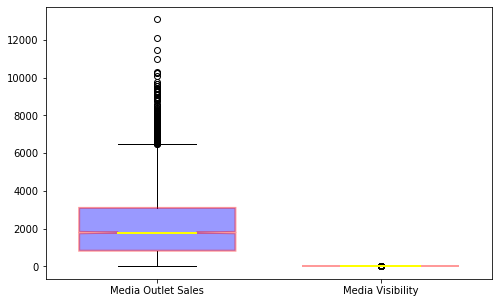

In [139]:
OutletSales_Mean = df['Item_Outlet_Sales']
VisibilityMean = df['Item_Visibility']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
boxplots = axes.boxplot([OutletSales_Mean, VisibilityMean],
           notch = True,
           labels=['Media Outlet Sales', 'Media Visibility'],
           widths = .7,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=2, color='Yellow'),
           boxprops = dict(linestyle='--', linewidth=2, color='Red', facecolor = 'blue', alpha = .4)
          );